In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# バックグラウンドの削除と反転処理

In [2]:
pixels = 512
def reverse_and_background():
    print('iHR上の中心波長：', end='')
    center_wl = int(input())

    print('データが保存されているフォルダのパスを入力してください：')
    path = str(input())
    pass_list = []
    pass_list = os.listdir(path)
    sorted(pass_list)
    pass_list = [path + '/' + i for i in pass_list]
    numberofdata = len(pass_list)

    print('backgroundはありますか？　y or n：', end='')
    bg_judge = input()
    if bg_judge == 'y':
        print('backgroundファイルのパス：', end='')
        pass_bg = input().strip('"')
        df_bg = pd.read_csv(pass_bg, sep='\t', header=None)

    for i in range(numberofdata):
        df = pd.read_csv(pass_list[i], sep='\t', header=None)

        # backgroundを引く処理
        if bg_judge == 'y':
            df[1] = df[1] - df_bg[1]

        #x軸を反転させる処理
        df_reverse = df.iloc[::-1]

        #x軸にラフな値を代入する処理
        list_wl = []
        start_wl = center_wl - 246  #246は過去の結果からの概算結果
        delta_wl = 509.5 / 511
        for j in range(pixels):
            list_wl.append(start_wl + delta_wl * j)
        df_reverse[0] = list_wl

        #保存
        df_reverse.to_csv(pass_list[i][:-4] + '_reversed.txt', index=False, header=False)
        print(i + 1, '番目のデータが保存されました')

# ファイル入出力

In [3]:
data_dir = "../data/arhg"

In [4]:
def read_data(filepath):
    data = []
    with open(filepath, "r") as f:
        match_pattern = r'^\s*(#.*|)$'
        line = f.readline()
        while line:
            match = re.match(match_pattern, line)
            if not match:
                data.append([float(x) for x in line.split(",")])
            line = f.readline()
    return np.array(data)

# ArgHg

In [5]:
%matplotlib ipympl

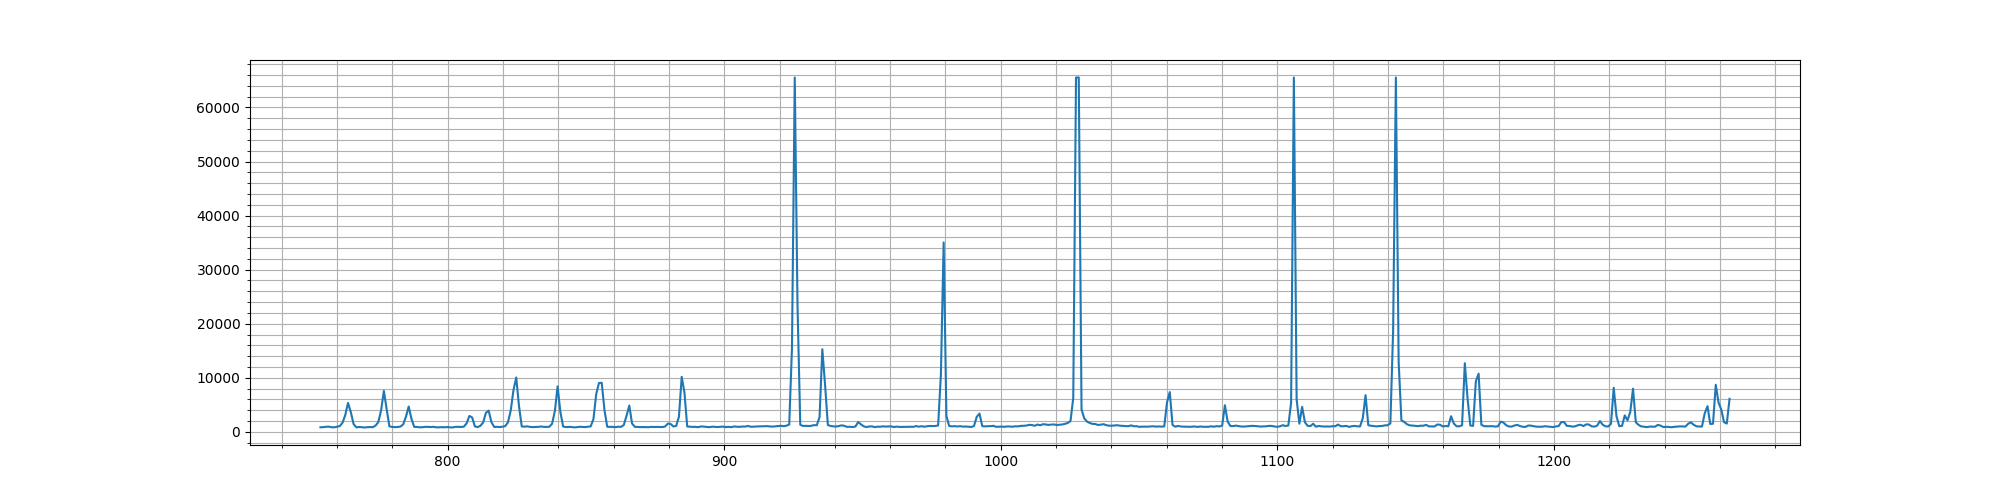

In [6]:
data = read_data(os.path.join(data_dir, "arhg0.1-1000_reversed.txt"))
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.minorticks_on()
plt.grid(which='both')
plt.show()

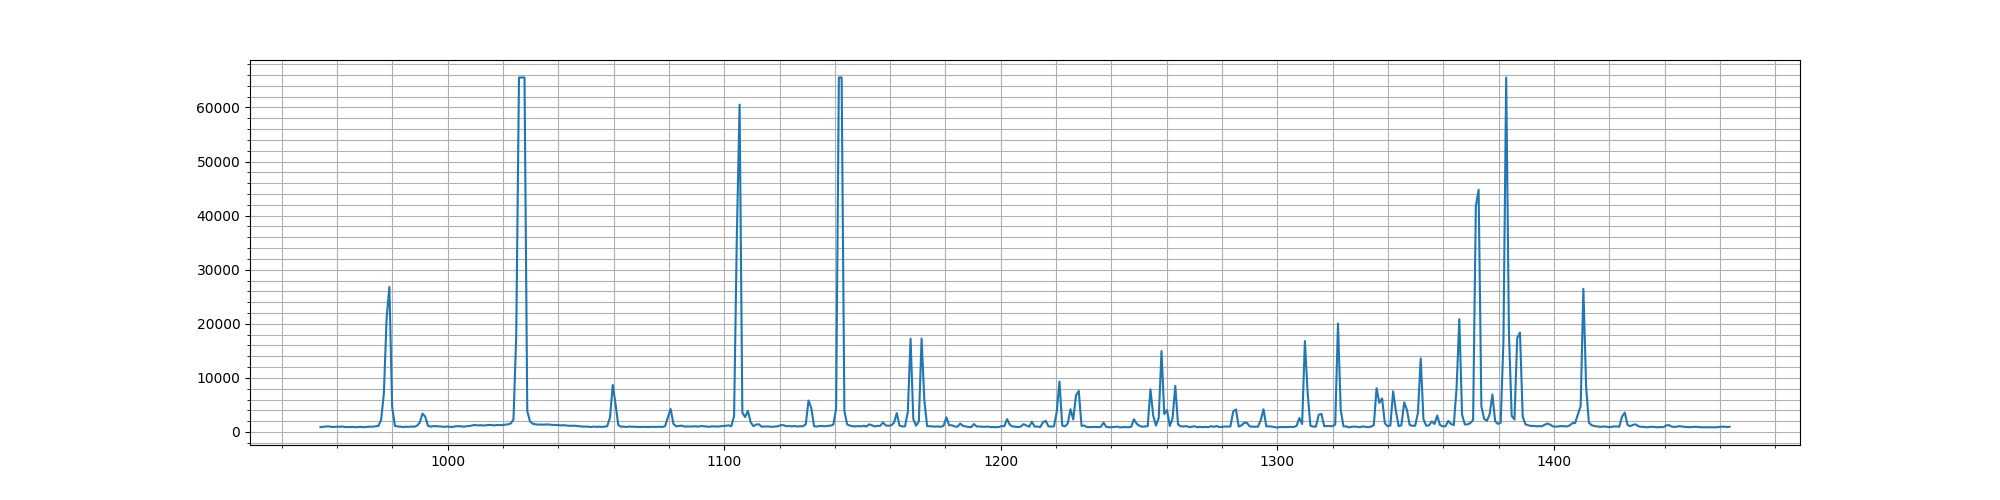

In [7]:
data = read_data(os.path.join(data_dir, "arhg0.1-1200_reversed.txt"))
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.minorticks_on()
plt.grid(which='both')
plt.show()

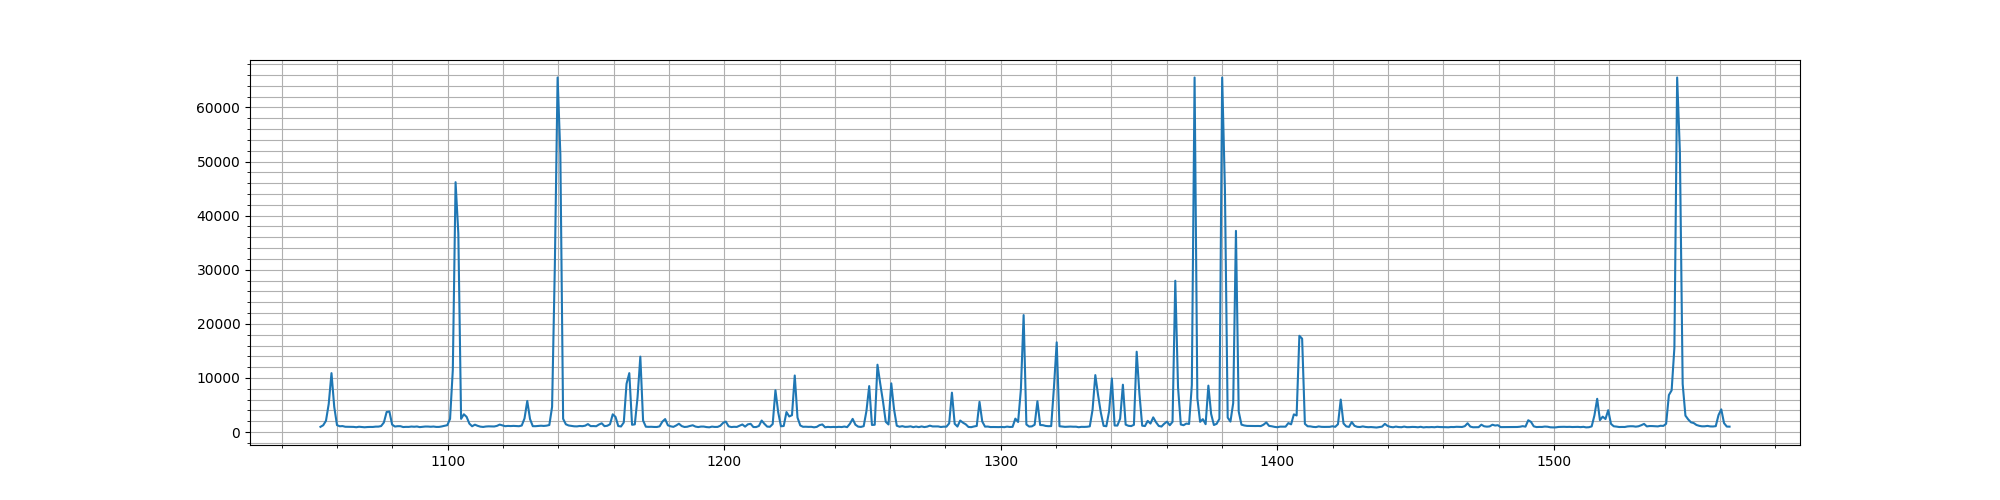

In [8]:
data = read_data(os.path.join(data_dir, "arhg0.1-1300_reversed.txt"))
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.minorticks_on()
plt.grid(which='both')
plt.show()

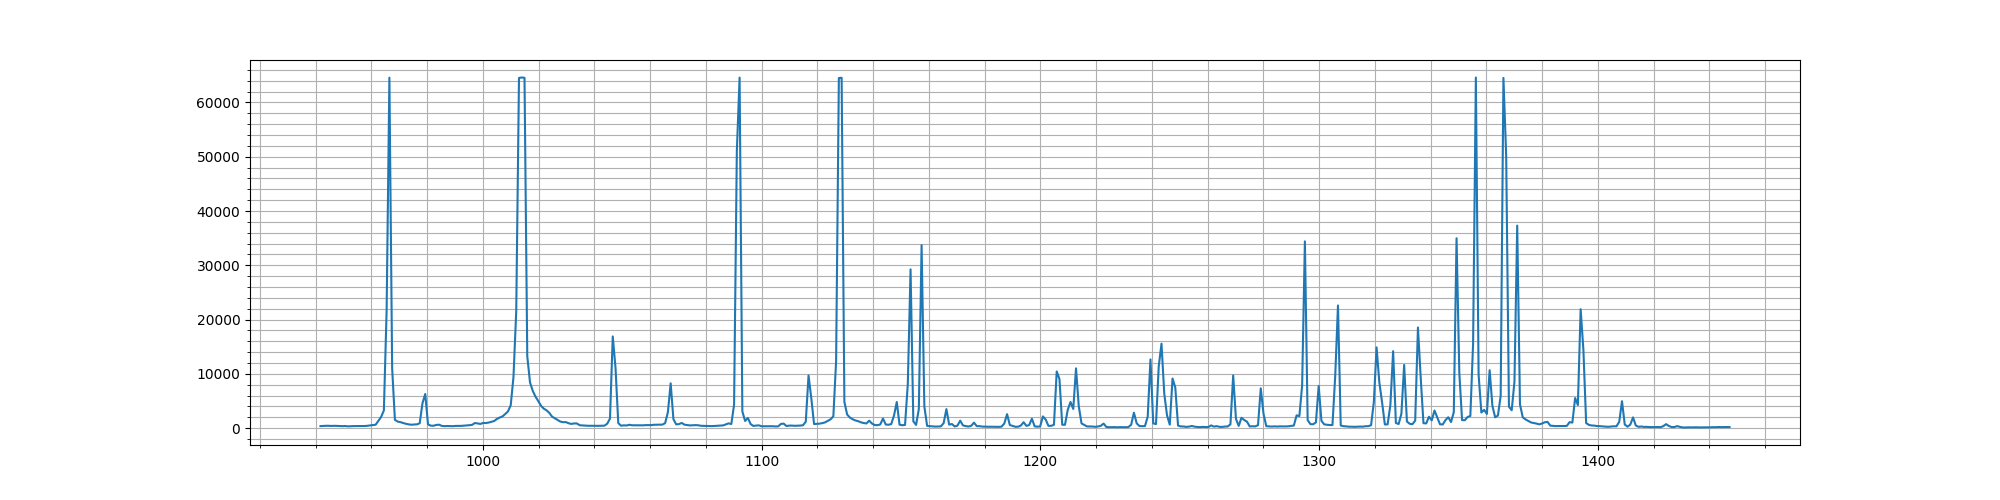

In [9]:
data = read_data(os.path.join(data_dir, "1sarhg_reversed_1720510508.1405735.txt"))
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [10]:
%matplotlib inline